In [3]:
using Plots
using LaTeXStrings
gr()

Plots.GRBackend()

# 磁流体力学波的相速度图

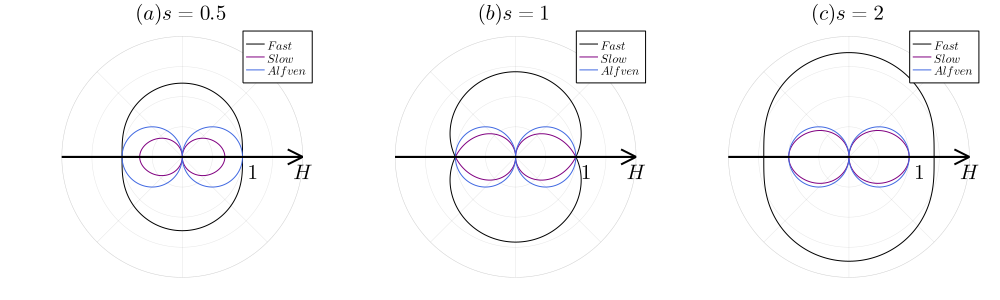

In [4]:
function FastSlowWave(Vₐ::Float64, Cₛ::Int, θ₀::Array, mode::String)
    if mode == "fast"
       strength = sqrt.(1/2 .* (Vₐ ^2 + Cₛ ^2 .+ sqrt.((Vₐ^2 + Cₛ^2) ^2 .- 4 * Vₐ^2 .* Cₛ^2 .* (cos.(θ₀)).^2)))
    end
    if mode == "slow"
       strength = sqrt.(1/2 .* (Vₐ ^2 + Cₛ ^2 .- sqrt.((Vₐ^2 + Cₛ^2) ^2 .- 4 * Vₐ^2 .* Cₛ^2 .* (cos.(θ₀)).^2)))
    end
    return strength
 end
 
l = @layout([a b c])
θ₀ = collect(range(0, 2π, length = 1000))
p1 = plot(θ₀, FastSlowWave(sqrt(1/2), 1, θ₀, "fast"),color=:black, proj=:polar,label=L"\rm{Fast}")
p1 = plot!(θ₀, FastSlowWave(sqrt(1/2), 1, θ₀, "slow"),color=:purple, proj=:polar, label=L"\rm{Slow}")
p1 = plot!(θ₀, 1 * abs.(cos.(θ₀)), proj=:polar, color=:royalblue,label=L"\rm{Alfven}")
p1 = plot!([0,0],[-2,2],proj=:polar, arrow=true,color=:black,linewidth=2,label="")
p1 = annotate!([(1, -0.1, text(L"H"))])
p1 = annotate!([(0.6, -0.1, text(L"1"))])

p2 = plot(θ₀, FastSlowWave(1.0, 1, θ₀, "fast"), color=:black, proj=:polar, label=L"\rm{Fast}")
p2 = plot!(θ₀, FastSlowWave(1.0, 1, θ₀, "slow"), color=:purple, proj=:polar,  label=L"\rm{Slow}")
p2 = plot!(θ₀, 1 * abs.(cos.(θ₀)), proj=:polar, color=:royalblue,label=L"\rm{Alfven}")
p2 = plot!([0,0],[-2,2],proj=:polar, arrow=true,color=:black,linewidth=2,label="")
p2 = annotate!([(1, -0.1, text(L"H"))])
p2 = annotate!([(0.6, -0.1, text(L"1"))])

p3 = plot(θ₀, FastSlowWave(sqrt(2), 1, θ₀, "fast"), color=:black, proj=:polar, label=L"\rm{Fast}")
p3 = plot!(θ₀, FastSlowWave(sqrt(2), 1, θ₀, "slow"),color=:purple, proj=:polar,  label=L"\rm{Slow}")
p3 = plot!(θ₀, 1 * abs.(cos.(θ₀)), proj=:polar, color=:royalblue, label=L"\rm{Alfven}")
p3 = plot!([0,0],[-2,2],proj=:polar, arrow=true, color=:black,linewidth=2,label="")
p3 = annotate!([(1, -0.1, text(L"H"))])
p3 = annotate!([(0.6, -0.1, text(L"1"))])


plot(p1, p2, p3, layout=l,lims=(0,2), ticks =:nothing, border=:none, legend=:topright, xaxis=false, yaxis=false, framestyle = :none, title=[L"(a) s=0.5" L"(b) s=1" L"(c) s=2"])
plot!(size=(1000,300))

# savefig("./wave.pdf")
 
 

# 磁流体力学快磁声激波关系

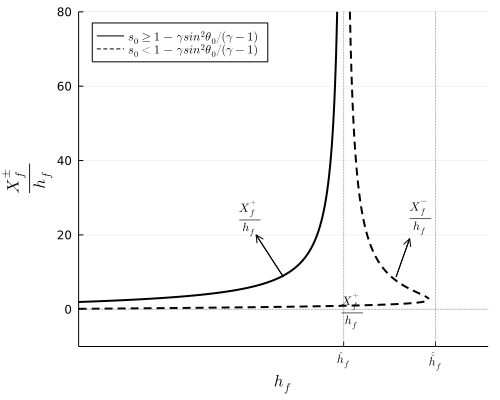

In [5]:
Base.@kwdef struct shock
    γ::Float64 = 5/3
    θ::Float64 = π/12
    s0::Float64 = 1.5 - γ * sin(θ)^2 / (γ - 1) 
    s1::Float64 = 0.5 - γ * sin(θ)^2 / (γ - 1) 
    h_ = (2* sin(θ)/(γ - 1))
    hf = collect(range(0, (2* sin(θ)/(γ - 1)), length=1000))
    hf_ = 1 / (2 * (γ-1) - 0.5 * γ^2 * (sin(θ)^2)) * (sin(θ)*(2-γ)*(1+s0) + 2 * cos(θ) * sqrt((γ-1) * (1-s0)^2 + s0*γ^2*sin(θ)^2))
    hff = collect(range(2*sin(θ) / (γ-1), hf_, length=1000))
    hfff = collect(range(0, hf_, length=1000)) 
end


u = shock()


function f(h::Array, s::Float64)
    B = (u.γ/2) .* h .* sin(u.θ) .- (1-s)
    C = 2 * sin(u.θ) .- (u.γ - 1) .* h
    Rx = B.^2 .+ C .* (h .+ 2*s*sin(u.θ))
    @fastmath res = (B .+ sqrt.(Rx)) ./ C
    return res
end

function f1(h::Array, s::Float64)
    B = (u.γ/2) .* h .* sin(u.θ) .- (1-s)
    C = 2 * sin(u.θ) .- (u.γ - 1) .* h
    Rx = B.^2 .+ C .* (h .+ 2*s*sin(u.θ))
    @fastmath res = (B .- sqrt.(Rx)) ./ C
    return res
end


u = shock()

plot(u.hf, f(u.hf, u.s0), linecolor=:black, label=L"s_0\geq 1-\gamma sin^2\theta_0/(\gamma-1)", linewidth=2)

plot!(u.hff, f1(u.hff, u.s1),linecolor=:black, linestyle=:dash, label=""  , linewidth=2)

plot!(u.hfff, f(u.hfff, u.s1),linecolor=:black, linestyle=:dash, 
label=L"s_0 < 1-\gamma sin^2\theta_0/(\gamma-1)" , linewidth=2)

plot!(xlims=(0, 1.2), ylims=(-10, 80))

plot!(legend=:topleft)

plot!([u.hf_], seriestype=:vline, linecolor=:gray, linestyle= :dot ,label="") 
plot!([u.h_], seriestype=:vline, linecolor=:gray, linestyle= :dot ,label="")

plot!([0], seriestype=:hline, linecolor=:gray, linestyle= :dot ,label="")
annotate!([(0.5, 25, text(L"\frac{X^{+}_{f}}{h_f}", 8))])
plot!([0.6,0.52],[8.7,20], arrow=true, color=:black,linewidth=1,label="")

annotate!([(1, 25, text(L"\frac{X^{-}_{f}}{h_f}", 8))])
plot!([0.93, 0.97],[8.7,19], arrow=true, color=:black,linewidth=1,label="")
xticks!([u.h_, u.hf_], ["\$\\hat h_f\$", "\$\\hat \\hat h_f\$"])

xlabel!(L"h_f")
ylabel!(L"\frac{X^{\pm}_{f}}{h_f}")
annotate!([(0.8, 0, text(L"\frac{X^{+}_{f}}{h_f}", 8))])

plot!(size=(500,400), dpi=300)
# savefig("./ex3.pdf")

